In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import bokeh.charts as charts
charts.output_notebook()

<div class="bk-root">
        <a href="http://bokeh.pydata.org" target="_blank" class="bk-logo bk-logo-small bk-logo-notebook"></a>
        <span id="a10ffa51-0ef6-49be-abc6-2ce0f5f0e072">Loading BokehJS ...</span>
    </div>

<div class="bk-root">
        <a href="http://bokeh.pydata.org" target="_blank" class="bk-logo bk-logo-small bk-logo-notebook"></a>
        <span id="a10ffa51-0ef6-49be-abc6-2ce0f5f0e072">Loading BokehJS ...</span>
    </div>

# Part II

Let's examine the the number of broadband users per capita in the year of 2010. This data was not available from GapMinder, so I took it upon myself to generate it from data set sets for the population and the number of broadband users.

In [3]:
broadband = "broadband total.xlsx"
broadband_df = pd.read_excel(broadband, encoding="utf-8-sig")

pop = "indicator gapminder population.xlsx"
pop_df = pd.read_excel(pop, encoding="utf-8-sig")

Let's reindex based on country name, fill any missing data with zeroes, and cast the GDP values from float to int:

In [4]:
for df in [broadband_df, pop_df]:
    countries = df.iloc[:, 0]
    countries.name = "Country"
    df.drop(df.columns[0], axis=1, inplace=True)
    df.fillna(0, inplace=True)
    df.index = countries
    df.columns = df.columns.astype(int)
    for column in df.columns:
        df[column] = df[column].astype(int)

Let's generate a dataset of broadband subscribers per capita from the datasets of broadband subscribers and population:

In [5]:
broadband_df.shape, pop_df.shape

((213, 17), (275, 81))

Let's leave only the common indexes:

In [6]:
common_countries = np.intersect1d(broadband_df.index, pop_df.index)
common_countries.shape
broadband_df = broadband_df.loc[common_countries]
pop_df = pop_df.loc[common_countries]
broadband_df.shape, pop_df.shape

((201, 17), (201, 81))

And the common columns:

In [7]:
common_years = np.intersect1d(broadband_df.columns, pop_df.columns)
common_years
broadband_df = broadband_df[common_years]
pop_df = pop_df[common_years]
broadband_df.shape, pop_df.shape

((201, 17), (201, 17))

The dataframes now have the same indexes and columns. Let's compute the ratios of broadband subscribers per capita:

In [8]:
broadband_per_capita = broadband_df.div(pop_df, axis="index")
broadband_per_capita.fillna(0, inplace=True)
broadband_per_capita.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000009,0.000009,0.000020,0.000019,0.000019,0.000037,0.000054,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000088,0.000000,0.003321,0.021563,0.031401,0.036362,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000556,0.001097,0.004058,0.005037,0.008378,0.013932,0.023106,0.024975,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016159,0.048153,0.080192,0.127316,0.175309,0.218266,0.241450,0.268397,0.290243,0.0


Let's examine the data for the year of 2010 (latest available):

In [9]:
year2010 = broadband_per_capita[2010][broadband_per_capita[2010] > 0]
year2010.name = "broadband_users_per_capita"
year2010.shape

(187,)

In [10]:
bottom10 = year2010[year2010.isin(np.sort(year2010)[:10])]
bottom10

Country
Afghanistan    0.000054
Burundi        0.000021
Cameroon       0.000049
Chad           0.000013
Congo, Rep.    0.000030
Eritrea        0.000025
Ethiopia       0.000047
Guinea         0.000045
Iraq           0.000002
Liberia        0.000047
Name: broadband_users_per_capita, dtype: float64

In [11]:
top10 = year2010[year2010.isin(np.sort(year2010)[-10:])]
top10

Country
Bermuda           0.627013
Cayman Islands    0.339621
Denmark           0.376940
France            0.339019
Gibraltar         0.339483
Iceland           0.343389
Liechtenstein     0.634028
Netherlands       0.380601
Norway            0.352400
Switzerland       0.371382
Name: broadband_users_per_capita, dtype: float64

In [12]:
mean = year2010.mean()
mean

0.09633212338500008

In [13]:
var = year2010.var()
var

0.015332285963978993

#### 1)

Let's set up the four distributions from the data:

In [14]:
class FrozenDistFactory:       
    distributions = {}
    dof = {}
    
    def __init__(self, dist_info, data):
        for name in dist_info:
            typename, dof = dist_info[name]
            param = getattr(stats, typename).fit(data)
            dist = getattr(stats, typename)(*param)
            self.distributions[name] = dist
            self.dof[name] = dof
    
    def get_frozen_dist(self, name):
        return self.distributions[name]
    
    def get_dist_dof(self, name):
        return self.dof[name]
    
    def items(self):
        for name in self.distributions:
            yield name, self.distributions[name], self.dof[name]

In [15]:
#the second value of the tuple is the number of parameters
distributions = {
    "Uniform": ("uniform", 1),
    "Exponential": ("expon", 1),
    "Normal": ("norm", 2),
    "Gamma": ("gamma", 2)
}

frozen_dist_factory = FrozenDistFactory(distributions, year2010)

#### 2)

The data does not have to fit one of these four distributions. Even if the population does have one of the four distributions, the data may be too sparse to fit any of them well.

#### 3)

A dataset could have several distinctly distributed groups, which might result in a mixed distribution. However, this does not seem to be the case with my data.

#### 4)

Let's plot a histogram of the rates of broadband subscribers per capita:

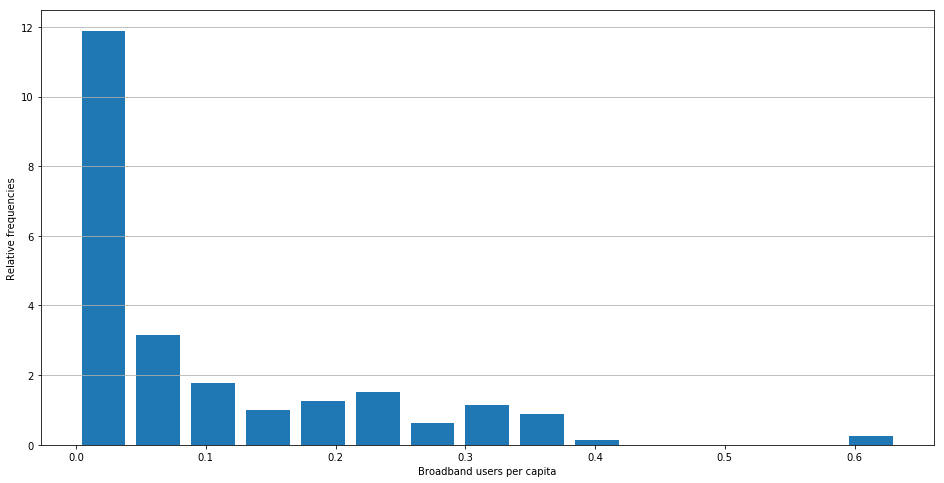

In [16]:
bins = 15

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.yaxis.grid(True)
ax.hist(x=year2010, bins=bins, normed=True, rwidth=0.8, label=None)
ax.set_ylabel("Relative frequencies")
ax.set_xlabel("Broadband users per capita")
fig

#### 5)

Let's overlay the four fitted distributions on the histogram:

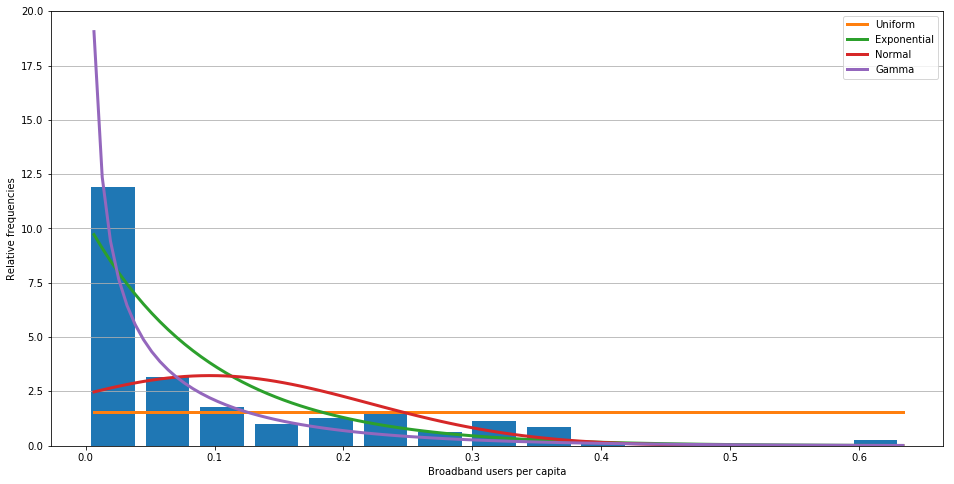

In [17]:
x = np.linspace(start=year2010.min(), stop=year2010.max(), num=100)[1:]

for name, dist, _ in frozen_dist_factory.items():
    ax.plot(x, dist.pdf(x), linewidth=3, label=name)

ax.legend(loc="best")
fig

Let's compare the results of the Pearson Chi-Squared test for the four candidate distributions:

In [18]:
class Bin:
    next = None
    prev = None

    def __init__(self, count, left_edge, right_edge):
        self.count = count
        self.left_edge = left_edge
        self.right_edge = right_edge

    def __repr__(self):
        return f"Count: {self.count}, Left edge: {self.left_edge}, Right edge: {self.right_edge}"


class Histogram:
    head: Bin = None
    tail: Bin = None

    def __init__(self, bins=[]):
        if len(bins) == 0:
            return
        sorted_bins = sorted(bins, key=lambda bin: bin.left_edge)
        self.tail = self.head = sorted_bins[0]
        for bin in sorted_bins[1:]:
            self.append(bin)

    def append(self, bin: Bin):
        self.tail.next = bin
        bin.prev = self.tail
        self.tail = bin

    def remove(self, bin: Bin):
        if bin.next is not None:
            self.merge_bins(bin, bin.next)
            if bin is self.head:
                self.head = bin.next
        elif bin.prev is not None:
            self.merge_bins(bin.prev, bin)
            if bin is self.tail:
                self.tail = bin.prev

    def merge_bins(self, left: Bin, right: Bin):
        right.prev = left.prev
        if left.prev is not None:
            left.prev.next = right
        right.left_edge = left.left_edge
        right.count += left.count

    def items(self):
        index = self.head
        while index is not None:
            yield index
            index = index.next

    def __repr__(self):
        rep = ""
        count = 0
        for item in self.items():
            rep += repr(item) + "\n"
            count = count + 1
        rep += f"({count} bins)"
        return rep


def test_distribution(dist, sample, ddof=1):
    max_bins = 8

    f_obs, bin_edges = np.histogram(sample, max_bins, (sample.min(), sample.max()))
    #bin_edges[0] = -np.inf
    #bin_edges[bin_edges.size-1] = np.inf

    bins_obs = []
    for i in range(0, bin_edges.size - 1):
        bins_obs.append(Bin(f_obs[i], bin_edges[i], bin_edges[i + 1]))
    hist_obs = Histogram(bins_obs)

    bins_exp = []
    p_exp = []
    for i in range(0, bin_edges.size - 1):
        x1, x2 = (bin_edges[i], bin_edges[i + 1])
        p = dist.cdf(x2) - dist.cdf(x1)
        p_exp.append(p)
    f_exp = np.array(p_exp) * sample.size
    for i in range(0, bin_edges.size - 1):
        bins_exp.append(Bin(f_exp[i], bin_edges[i], bin_edges[i + 1]))
    hist_exp = Histogram(bins_exp)

    bad_counts = True
    while bad_counts:
        bad_counts = False
        for exp, obs in zip(hist_exp.items(), hist_obs.items()):
            if (obs.count + exp.count) < 10:
                hist_obs.remove(obs)
                hist_exp.remove(exp)
                bad_counts = True
                break

    f_obs = [bin.count for bin in hist_obs.items()]
    f_exp = [bin.count for bin in hist_exp.items()]

    result = stats.power_divergence(f_obs, f_exp, ddof)
    return result.statistic, result.pvalue

In [19]:
fit_stats = pd.DataFrame(index=["Chi-Square statistic", "P-value"])
for name, dist, dof in frozen_dist_factory.items():
    result = test_distribution(dist=dist, sample=year2010, ddof=dof)
    fit_stats[name] = result
fit_stats

,Uniform,Exponential,Normal,Gamma
Chi-Square statistic,4.358451e+02,29.404475,1.536731e+02,5.559706e+01
P-value,5.457649e-91,0.000002,4.268925e-34,8.457686e-13


Based on the small P-values, none of the four distributions fit the data well. Some of the reasons could be an insufficient number of samples (there are only so many countries) and the existence distinctly distributed subpopulations. For instance, it is quite possible that developed nations will have different trends when it comes to broadband use than developed nations, which could result in different distributions for the rate of broadband users per capita.

# Part III

In [86]:
data = year2010.copy()
data.head()

Country
Afghanistan    0.000054
Albania        0.036362
Algeria        0.024975
Andorra        0.290243
Angola         0.000943
Name: broadband_users_per_capita, dtype: float64

The sample mean from Part II becomes our population mean:

In [87]:
population_mean = mean
population_mean

0.09633212338500008

The sample variance from Part II becomes our population variance:

In [88]:
population_var = var
population_var

0.015332285963978993

#### 1)

Let's compute the means for each sample (N, n)

In [89]:
n_values = [2, 5, 10, 100, 200]
N_values = [10, 100, 500]

index = pd.MultiIndex.from_product([n_values, N_values], names=["n", "N"])
means = pd.DataFrame(index=range(500), columns=index)

def get_N_means(N, n):
    means = np.empty(N)
    for i in range(N):
        means[i] = year2010.sample(n, replace=True).mean()
    return means

for n in n_values:
    for N in N_values:
        sample = get_N_means(N, n)
        s = pd.Series(sample, index=range(N))
        means.loc[:, (n, N)] = s

In [90]:
means[:20]

<div>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>n</th>
      <th colspan="3" halign="left">2</th>
      <th colspan="3" halign="left">5</th>
      <th colspan="3" halign="left">10</th>
      <th colspan="3" halign="left">100</th>
      <th colspan="3" halign="left">200</th>
    </tr>
    <tr>
      <th>N</th>
      <th>10</th>
      <th>100</th>
      <th>500</th>
      <th>10</th>
      <th>100</th>
      <th>500</th>
      <th>10</th>
      <th>100</th>
      <th>500</th>
      <th>10</th>
      <th>100</th>
      <th>500</th>
      <th>10</th>
      <th>100</th>
      <th>500</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.031834</td>
      <td>0.153210</td>
      <td>0.027036</td>
      <td>0.022260</td>
      <td>0.189546</td>
      <td>0.018542</td>
      <td>0.061378</td>
      <td>0.045642</td>
      <td>0.135429</td>
      <td>0.073299</td>
      <td>0.116341</td>
      <td>0.107365</td>
      <td>0.084513</td>
      <td>0.097248</td>
      <td>0.092775</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.040824</td>
      <td>0.156711</td>
      <td>0.188536</td>
      <td>0.102143</td>
      <td>0.013157</td>
      <td>0.058824</td>
      <td>0.074374</td>
      <td>0.150490</td>
      <td>0.169571</td>
      <td>0.094096</td>
      <td>0.095395</td>
      <td>0.099984</td>
      <td>0.082120</td>
      <td>0.072265</td>
      <td>0.087480</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.204161</td>
      <td>0.455332</td>
      <td>0.107885</td>
      <td>0.091877</td>
      <td>0.173143</td>
      <td>0.077631</td>
      <td>0.098281</td>
      <td>0.080585</td>
      <td>0.085977</td>
      <td>0.096187</td>
      <td>0.094163</td>
      <td>0.083854</td>
      <td>0.087328</td>
      <td>0.090448</td>
      <td>0.106856</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.057284</td>
      <td>0.000337</td>
      <td>0.273175</td>
      <td>0.042133</td>
      <td>0.109326</td>
      <td>0.082286</td>
      <td>0.107443</td>
      <td>0.084266</td>
      <td>0.144310</td>
      <td>0.115081</td>
      <td>0.084086</td>
      <td>0.089419</td>
      <td>0.107266</td>
      <td>0.092197</td>
      <td>0.094195</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.047761</td>
      <td>0.203819</td>
      <td>0.121214</td>
      <td>0.077905</td>
      <td>0.284163</td>
      <td>0.096634</td>
      <td>0.117400</td>
      <td>0.055256</td>
      <td>0.114725</td>
      <td>0.120599</td>
      <td>0.101090</td>
      <td>0.091259</td>
      <td>0.093083</td>
      <td>0.102024</td>
      <td>0.096540</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.074769</td>
      <td>0.008965</td>
      <td>0.007828</td>
      <td>0.107519</td>
      <td>0.036721</td>
      <td>0.044371</td>
      <td>0.156906</td>
      <td>0.093029</td>
      <td>0.095057</td>
      <td>0.119266</td>
      <td>0.091001</td>
      <td>0.089104</td>
      <td>0.102724</td>
      <td>0.096003</td>
      <td>0.107695</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.118456</td>
      <td>0.109835</td>
      <td>0.113034</td>
      <td>0.041883</td>
      <td>0.087850</td>
      <td>0.186636</td>
      <td>0.149575</td>
      <td>0.043645</td>
      <td>0.101801</td>
      <td>0.094191</td>
      <td>0.101435</td>
      <td>0.087140</td>
      <td>0.088323</td>
      <td>0.100362</td>
      <td>0.103566</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0.001351</td>
      <td>0.102273</td>
      <td>0.071630</td>
      <td>0.039366</td>
      <td>0.137678</td>
      <td>0.143388</td>
      <td>0.087924</td>
      <td>0.085581</td>
      <td>0.105198</td>
      <td>0.089911</td>
      <td>0.074376</td>
      <td>0.094118</td>
      <td>0.112818</td>
      <td>0.106274</td>
      <td>0.109796</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0.047809</td>
      <td>0.039235</td>
      <td>0.058346</td>
      <td>0.110560</td>
      <td>0.099223</td>
      <td>0.095671</td>
      <td>0.0573

#### 2)

The Central Limit Theorem holds only for sums of reasonably large sample sizes. Thus, the distribution of the means will appear more normal for larger values of $n$. For very small values of $n$ such as $n=2$ or $n=5$, the distribution of the means will more closesly resemble the distribution of the population and will have a similar mean and standard deviation. These effects may be difficult to observe for $N=10$, due to a small number of sampled means.

#### 3)

Let's construct a histogram for each set of sample means:

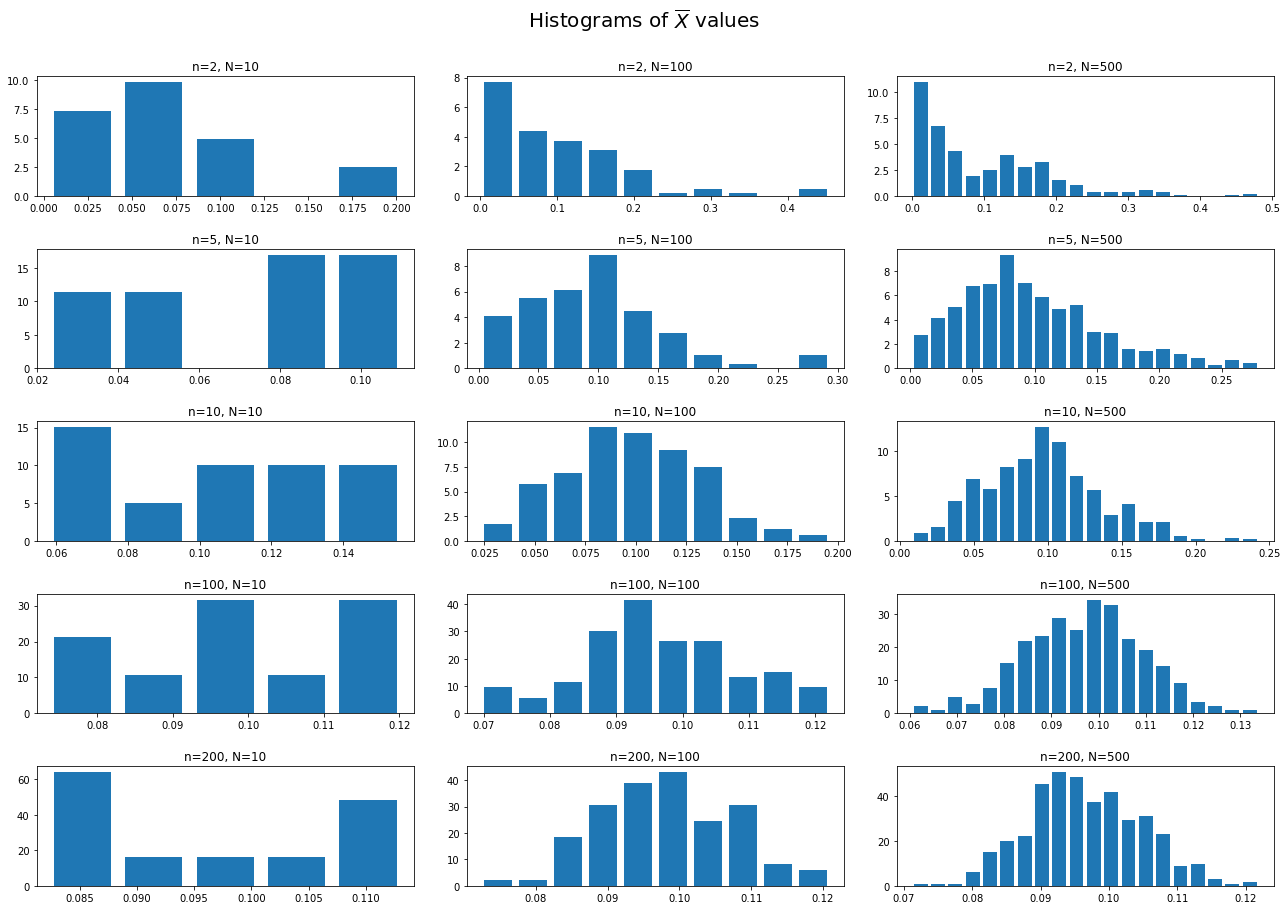

In [91]:
fig = plt.figure(figsize=(18, 12))

def bins_for(N):
    bins = {
        10: 5,
        100: 10,
        500: 20
    }
    return bins.get(N)

i = 1
for column in means:
    n, N = column
    s = means[column][:N]
    ax = fig.add_subplot(len(n_values), len(N_values), i)
    ax.hist(x=s, bins=bins_for(N), normed=True, rwidth=0.8, label=None)
    ax.set_title(f"n={n}, N={N}")
    i += 1

fig.tight_layout(w_pad=2.0, h_pad=2.0)
fig.suptitle("Histograms of " + r"$\overline{X}$" + " values", y=1.05, fontsize=20)
fig

The histograms for $N=500$ provide a good demonstration of how the distribution of sample means changes as the sample size is increased. In particular, the histograms for $n=100$ and $n=200$ appear to have nearly perfect normal distributions.

In [92]:
plt.close("all")

#### 4)

The theoretical distribution of $\overline{X}$ is $N(\mu, \sigma / \sqrt{n})$, where $\mu$ and $\sigma$ are our population mean and population variance, and n is the sample size:

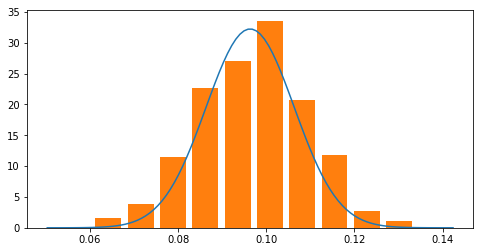

In [98]:
dist = stats.norm(population_mean, np.sqrt(population_var/100))
x_min = dist.ppf(0.0001)
x_max = dist.ppf(0.9999)
x = np.linspace(x_min, x_max, 100)
y = dist.pdf(support)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.hist(means[(100, 500)], bins=10, normed=True, rwidth=0.8)
fig